C:\Users\armr1\AppData\Local\Temp\ipykernel_15176\2344942961.py:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-x**2 - y**2 + 1)


El volumen aproximado es de:  2.1915562346794717


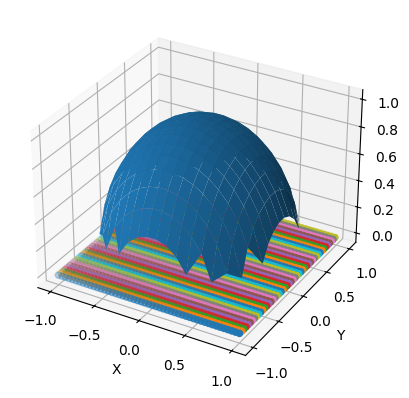

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math

def funcion(x, y):
    return np.sqrt(-x**2 - y**2 + 1)

#a) Cree una grilla entre −R y R en el plano xy, donde el número de cuadrados 
#en cada lado de la grilla sea n. Es decir, la grilla tendría n + 1 
#puntos en cada eje, y n^2 cuadrados pequeños.

def crear_grilla(n):
    X = np.linspace(-1, 1, n)
    Y = np.linspace(-1, 1, n)
    X, Y = np.meshgrid(X, Y)
    return X, Y

#b) Para cada cuadrado peque˜no calculo el promedio de la funci´on en los cuatro v´ertices
#y multiplique por el ´area del cuadrado peque˜no. Si el punto queda fuera de la esfera
#asuma que el valor de la funci´on f(x, y) es cero.

def volumen(grilla,ax,f):
    at=0
    vt=0
    
    for i in range(len(grilla[0])-1):
        ax.scatter(grilla[0][i],grilla[1][i])
        for j in range(len(grilla[0][i])-1):    
            a = (grilla[0][i][j]-grilla[0][i][j+1])**2
            at += a
            
            v1 = f(grilla[0][i][j],grilla[0][i][j])
            v2 = f(grilla[0][i][j+1],grilla[0][i][j+1])
            v3 = f(grilla[0][i+1][j],grilla[0][i+1][j])
            v4 = f(grilla[0][i+1][j+1],grilla[0][i+1][j+1])
            
            if math.isnan(v1) == False and math.isnan(v2) == False and math.isnan(v3) == False and math.isnan(v4) == False:
                p = (v1+v2+v3+v4)/4
            else:
                p = 0
            
            v = a*p
            vt += v
    
    return vt
    
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
X_plot, Y_plot = crear_grilla(20)
Z = funcion(X_plot, Y_plot)

ax.plot_surface(X_plot, Y_plot,Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")

print("El volumen aproximado es de: ", volumen(crear_grilla(50),ax,funcion))
plt.show()